# Manage

## import

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpt
from scipy.fftpack import fft,ifft
import seaborn

## 读取数据

In [ ]:
force_01 = pd.read_csv(r'D:\data\20190513\Force\20190513_01_new.csv')
force_02 = pd.read_csv(r'D:\data\20190513\Force\20190513_02_new.csv')
force_03 = pd.read_csv(r'D:\data\20190513\Force\20190513_03_new.csv')
force_04 = pd.read_csv(r'D:\data\20190513\Force\20190513_04_new.csv')

In [5]:
force_all_0 = pd.concat([force_01, force_02, force_03, force_04],ignore_index = True)

用data计算，要self.data = data

### 模板代码

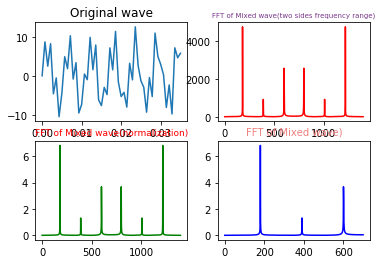

In [118]:
import numpy as np
from scipy.fftpack import fft,ifft
import matplotlib.pyplot as plt
import seaborn


#采样点选择1400个，因为设置的信号频率分量最高为600Hz，根据采样定理知采样频率要大于信号频率2倍，所以这里设置采样频率为1400Hz（即一秒内有1400个采样点）
x=np.linspace(0,1,1400)

#设置需要采样的信号，频率分量有180，390和600
y=7*np.sin(2*np.pi*180*x) + 1.5*np.sin(2*np.pi*390*x)+5.1*np.sin(2*np.pi*600*x)

yy=fft(y)                     #快速傅里叶变换
yreal = yy.real               # 获取实数部分
yimag = yy.imag               # 获取虚数部分

yf=abs(fft(y))                # 取模
yf1=abs(fft(y))/((len(x)/2))           #归一化处理
yf2 = yf1[range(int(len(x)/2))]  #由于对称性，只取一半区间

xf = np.arange(len(y))        # 频率
xf1 = xf
xf2 = xf[range(int(len(x)/2))]  #取一半区间

#原始波形
plt.subplot(221)
plt.plot(x[0:50],y[0:50])
plt.title('Original wave')
#混合波的FFT（双边频率范围）
plt.subplot(222)
plt.plot(xf,yf,'r') #显示原始信号的FFT模值
plt.title('FFT of Mixed wave(two sides frequency range)',fontsize=7,color='#7A378B')  #注意这里的颜色可以查询颜色代码表
#混合波的FFT（归一化）
plt.subplot(223)
plt.plot(xf1,yf1,'g')
plt.title('FFT of Mixed wave(normalization)',fontsize=9,color='r')

plt.subplot(224)
plt.plot(xf2,yf2,'b')
plt.title('FFT of Mixed wave)',fontsize=10,color='#F08080')


plt.show()

In [121]:
xf1

array([   0,    1,    2, ..., 1397, 1398, 1399])

#### 一代代码

class Manage():
    def __init__(self, data_0, small = -100, big = -10, start = 10000, step = 1000):
        self.data_0 = data_0
        self.small = small
        self.big = big
        self.start = start
        self.step = step
        self.stop = self.start + self.step
        self.x = data_0.Time[self.start:self.stop]
        plt.figure(figsize=(32,16)) # 设定画图板尺寸
       
        print('原始数据大小是：{}'.format(self.data_0.shape))
        #plt.plot(self.data_0.Fx12)
        
    def cut_1(self):
        self.data_0
        data_1 = self.data_0.query('Fx12!=0 and Fx34!=0 and Fy14!=0')
        print('除0后数据大小是{}。'.format(data_1.shape))
        
        plt.subplot(911)
        plt.plot(data_1.My)
        self.data_1 = data_1
        return self.data_1.shape
    
    def cut_2(self):
        self.cut_1()
        self.data_2 = self.data_1.query('My<{} and My>{}'.format(self.big, self.small))
        plt.subplot(912)
        print('除停机数据后大小是{}。'.format(self.data_2.shape))
        plt.plot(self.data_2.My)
        return self.data_2.shape
    
    def cut_3(self):
        self.cut_2()
        self.data_3 = self.data_2[self.start:self.stop]
        print('选择起始点{}，终止点{}进行FFT，共{}个数据。'.format(self.start, self.stop, self.data_3.shape))
        plt.subplot(913)
        plt.plot(self.data_3.My)
        return self.data_3
        
    def FxFFT(self):
        self.cut_3()
        z0 = fft(self.data_3.Fx)
        z0_abs = np.abs(z0)
        z0_final = z0_abs[1:]
        plt.subplot(914)
        plt.plot(z0_final)

    def FyFFT(self):
        self.cut_3()
        z0 = fft(self.data_3.Fy)
        z0_abs = np.abs(z0)
        z0_final = z0_abs[1:]
        plt.subplot(915)
        plt.plot(z0_final)
        
    def FzFFT(self):
        self.cut_3()
        z0 = fft(self.data_3.Fz)
        z0_abs = np.abs(z0)
        z0_final = z0_abs[1:]
        plt.subplot(916)
        plt.plot(z0_final)
        
    def MxFFT(self):
        self.cut_3()
        z0 = fft(self.data_3.Mx)
        z0_abs = np.abs(z0)
        z0_final = z0_abs[1:]
        plt.subplot(917)
        plt.plot(z0_final)
        
    def MyFFT(self):
        self.cut_3()
        z0 = fft(self.data_3.My)
        z0_abs = np.abs(z0)
        z0_final = z0_abs[1:]
        plt.subplot(918)
        plt.plot(z0_final)
        
    def MzFFT(self):
        self.cut_3()
        z0 = fft(self.data_3.Mz)
        z0_abs = np.abs(z0)
        z0_final = z0_abs[1:]
        plt.subplot(919)
        plt.plot(z0_final)

#### 测试代码

In [4]:
class Manage():
    def __init__(self, data_0, small = -4, big = -0.5, start = 10000, step = 1000):
        self.data_0 = data_0
        self.small = small
        self.big = big
        self.start = start
        self.step = step
        self.stop = self.start + self.step
        #self.x = data_0.Time[self.start:self.stop]
        self.data_1 = self.data_0.query('Fx12!=0 and Fx34!=0 and Fy14!=0')
        
        print(self.data_1.shape)
        self.data_2 = self.data_1.query('My<{} and My>{}'.format(self.big, self.small))
        print(self.data_2.shape)
        self.data_3 = self.data_2[self.start:self.stop]
        print('选择起始点{}，终止点{}进行FFT，共{}个数据。'.format(self.start, self.stop, self.data_3.shape))
        plt.plot(self.data_3.My)


    def shuo(self):
        print(self.data_3.shape)
        
AAA = Manage(A01)
AAA.shuo()

NameError: name 'A01' is not defined

#### 二代代码

In [108]:
class ForceFFT():
    def __init__(self, data_0, small = -4, big = -0.1, start = 10000, step = 1000):
        self.data_0 = data_0
        self.small = small
        self.big = big
        self.start = start
        self.step = step
        self.stop = self.start + self.step
        #self.x = data_0.Time[self.start:self.stop]

        self.data_1 = self.data_0.query('Fx12!=0 and Fx34!=0 and Fy14!=0')
        self.data_2 = self.data_1.query('My<{} and My>{}'.format(self.big, self.small))
        self.data_3 = self.data_2[self.start:self.stop]
        
        #做FFT
        self.FFTFx = fft(self.data_3.Fx)
        self.FFTFy = fft(self.data_3.Fy)
        self.FFTFz = fft(self.data_3.Fz)
        self.FFTMx = fft(self.data_3.Mx)
        self.FFTMy = fft(self.data_3.My)
        self.FFTMz = fft(self.data_3.Mz)
        
        #取绝对值
        FFTFx_abs = abs(self.FFTFx)
        FFTFy_abs = abs(self.FFTFy)
        FFTFz_abs = abs(self.FFTFz)
        FFTMx_abs = abs(self.FFTMx)
        FFTMy_abs = abs(self.FFTMy)
        FFTMz_abs = abs(self.FFTMz)
        
        #去除边缘值
        self.FFT_Fx_final_0 = FFTFx_abs[1:]
        self.FFT_Fy_final_0 = FFTFy_abs[1:]
        self.FFT_Fz_final_0 = FFTFz_abs[1:]
        self.FFT_Mx_final_0 = FFTMx_abs[1:]
        self.FFT_My_final_0 = FFTMy_abs[1:]
        self.FFT_Mz_final_0 = FFTMz_abs[1:]
        
        x = np.linspace(0,1,step)
        xf = np.arange(len(self.data_3))
        
        #X_0 = self.data_3.Time[1:]                           # 频率
        #X_1 = len(X_0)/2                                     # 取一半区间
        #X_2 = X_0[range(int(len(x)/2))]
        

              
        #由于对称性，只取一半区间
        self.FFT_Fx_final_1 = self.FFT_Fx_final_0[range(int(len(x)/2))] 
        self.FFT_Fy_final_1 = self.FFT_Fy_final_0[range(int(len(x)/2))] 
        self.FFT_Fz_final_1 = self.FFT_Fz_final_0[range(int(len(x)/2))] 
        self.FFT_Mx_final_1 = self.FFT_Mx_final_0[range(int(len(x)/2))] 
        self.FFT_My_final_1 = self.FFT_My_final_0[range(int(len(x)/2))] 
        self.FFT_Mz_final_1 = self.FFT_Mz_final_0[range(int(len(x)/2))] 
        
                #归一化处理
        self.FFT_Fx_final_2 = self.FFT_Fx_final_1 / ((len(x)/2))
        self.FFT_Fy_final_2 = self.FFT_Fy_final_1 / ((len(x)/2))
        self.FFT_Fz_final_2 = self.FFT_Fz_final_1 / ((len(x)/2))
        self.FFT_Mx_final_2 = self.FFT_Mx_final_1 / ((len(x)/2))
        self.FFT_My_final_2 = self.FFT_My_final_1 / ((len(x)/2))
        self.FFT_Mz_final_2 = self.FFT_Mz_final_1 / ((len(x)/2))
        
        plt.figure(figsize=(16,8)) # 设定画图板尺寸

    def draw_cut(self):
        
        print('原始数据大小是: {}。'.format(self.data_0.shape))
        print('除0后数据大小是: {}。'.format(self.data_1.shape))
        print('除停机数据后大小是: {}。'.format(self.data_2.shape))
        print('选择起始点{}，终止点{}进行FFT，共{}个数据。'.format(self.start, self.stop, self.data_3.shape))
            
        
        
        plt.subplot(411)
        plt.plot(self.data_0.My)
        plt.title('Original Data', fontsize = 14)

        plt.subplot(412)
        plt.title('WIthout 0 Data', fontsize = 14)
        plt.plot(self.data_1.My)

        plt.subplot(413)
        plt.title('Cutted Data', fontsize = 14)
        plt.plot(self.data_2.My)

        plt.subplot(414)
        plt.plot(self.data_3.My)
        plt.title('Do FFT Data', fontsize = 14)

    def draw_FFT_0(self):
        
        plt.figure(figsize=(16,8)) # 设定画图板尺寸
        plt.subplot(322)
        plt.title('Fx', fontsize = 14)
        plt.plot(self.FFT_Fx_final_0)
        plt.subplot(324)
        plt.title('Fy', fontsize = 14)
        plt.plot(self.FFT_Fy_final_0)
        plt.subplot(326)
        plt.title('Fz', fontsize = 14)
        plt.plot(self.FFT_Fz_final_0)
        plt.subplot(321)
        plt.title('Mx', fontsize = 14)
        plt.plot(self.FFT_Mx_final_0)
        plt.subplot(323)
        plt.title('My', fontsize = 14)
        plt.plot(self.FFT_My_final_0)
        plt.subplot(325)
        plt.title('Mz', fontsize = 14)
        plt.plot(self.FFT_Mz_final_0)

        
        
    def draw_FFT_1(self):
        
        plt.figure(figsize=(16,8)) # 设定画图板尺寸
        plt.subplot(322)
        plt.title('Fx', fontsize = 14)
        plt.plot(self.FFT_Fx_final_1)
        plt.subplot(324)
        plt.title('Fy', fontsize = 14)
        plt.plot(self.FFT_Fy_final_1)
        plt.subplot(326)
        plt.title('Fz', fontsize = 14)
        plt.plot(self.FFT_Fz_final_1)
        plt.subplot(321)
        plt.title('Mx', fontsize = 14)
        plt.plot(self.FFT_Mx_final_1)
        plt.subplot(323)
        plt.title('My', fontsize = 14)
        plt.plot(self.FFT_My_final_1)
        plt.subplot(325)
        plt.title('Mz', fontsize = 14)
        plt.plot(self.FFT_Mz_final_1)

        
    def draw_FFT_2(self):
        
        
        plt.figure(figsize=(16,8)) # 设定画图板尺寸
        
        plt.subplot(322)
        plt.title('FFTFx', fontsize = 14)
        plt.tick_params(axis = 'both', labelsize = 14)
        plt.plot(self.FFT_Fx_final_2)
        
        plt.subplot(324)
        plt.title('FFTFy', fontsize = 14)
        plt.tick_params(axis = 'both', labelsize = 14)
        plt.plot(self.FFT_Fy_final_2)
        
        plt.subplot(326)
        plt.title('FFTFz', fontsize = 14)
        plt.tick_params(axis = 'both', labelsize = 14)
        plt.plot(self.FFT_Fz_final_2)
        
        plt.subplot(321)
        plt.tick_params(axis = 'both', labelsize = 14)
        plt.title('FFTMx', fontsize = 14)
        plt.plot(self.FFT_Mx_final_2)
        
        plt.subplot(323)
        plt.title('FFTMy', fontsize = 14)
        plt.tick_params(axis = 'both', labelsize = 14)
        plt.plot(self.FFT_My_final_2)
        
        plt.subplot(325)
        plt.tick_params(axis = 'both', labelsize = 14)
        plt.title('FFTMz', fontsize = 14)
        plt.plot(self.FFT_Mz_final_2)

# 绘制原始图

#### 01

<Figure size 1152x576 with 0 Axes>

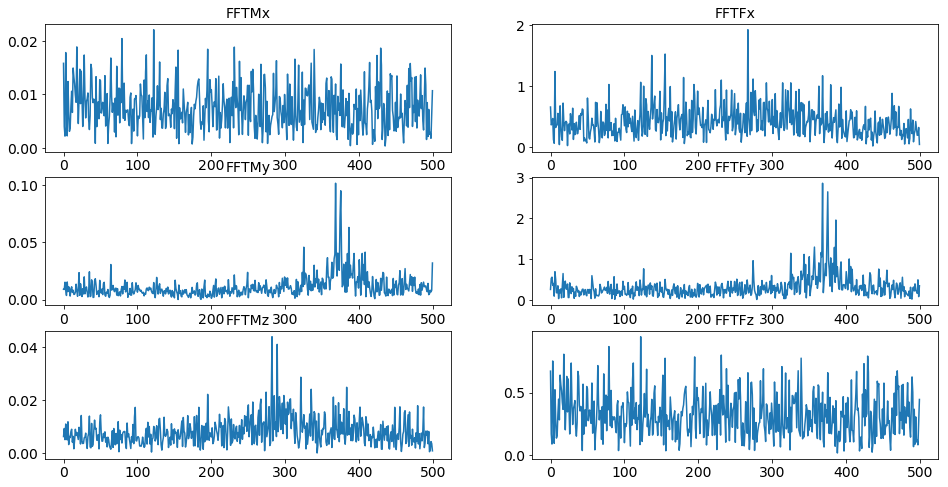

In [130]:
force_01_FFT = ForceFFT(force_01,small = -4, big = -0.5, start = 15000, step = 1000)
force_01_FFT.draw_FFT_2()
#print(force_01_FFT.FFT_My_final_2().describe())



In [134]:
#df = pd.DataFrame(force_01_FFT.FFT_My_final_2)
force_01_FFT.FFT_My_final_2.mean()

0.011251472194900844

In [136]:
df = pd.DataFrame(force_01_FFT.FFT_My_final_2)
df.max()

0    0.101616
dtype: float64

<Figure size 1152x576 with 0 Axes>

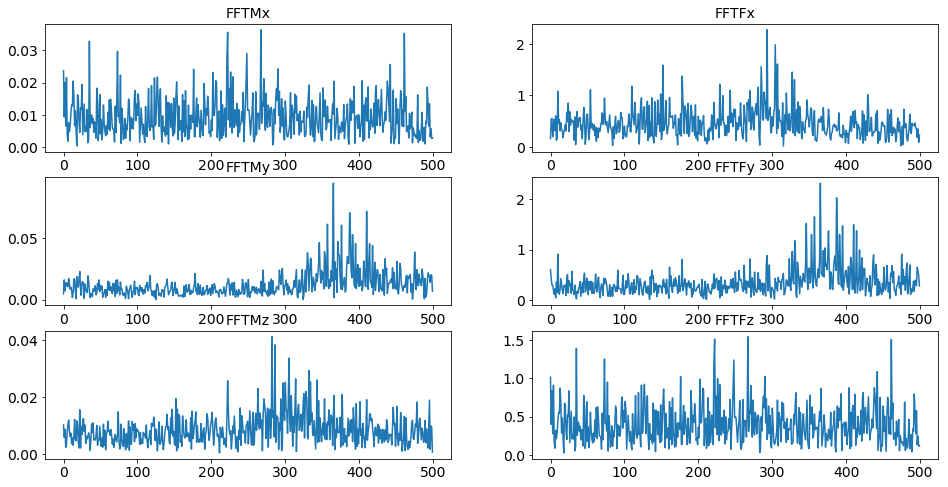

In [123]:
force_01_FFT = ForceFFT(force_03,small = -4, big = -0.5, start = 15000, step = 1000)
force_01_FFT.draw_FFT_2()

<Figure size 1152x576 with 0 Axes>

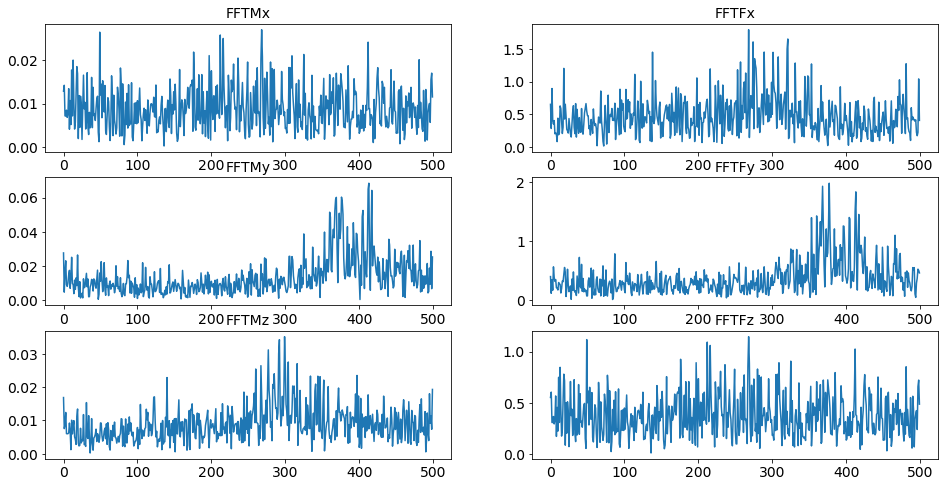

In [124]:
force_01_FFT = ForceFFT(force_04,small = -4, big = -0.5, start = 15000, step = 1000)
force_01_FFT.draw_FFT_2()

<Figure size 1152x576 with 0 Axes>

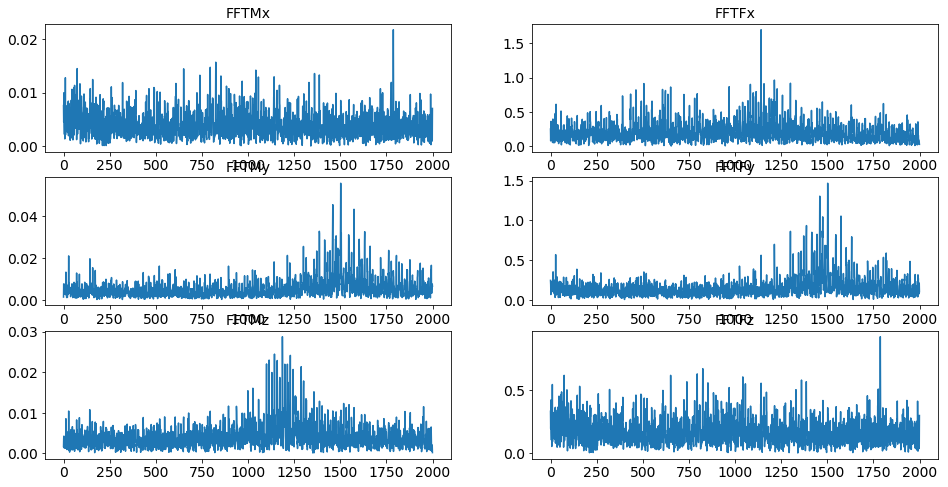

In [116]:
force_01_FFT = ForceFFT(force_01,small = -4, big = -0.5, start = 15000, step = 4000)
force_01_FFT.draw_FFT_2()

In [67]:
x=np.linspace(0,1,1400)
x

array([0.00000000e+00, 7.14796283e-04, 1.42959257e-03, ...,
       9.98570407e-01, 9.99285204e-01, 1.00000000e+00])

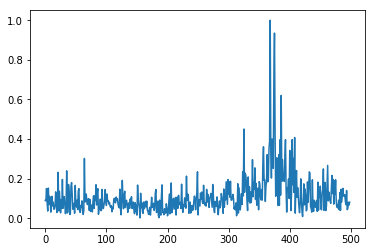

In [56]:
plt.plot(aaaaa)

原始数据大小是: (2500001, 10)。
除0后数据大小是: (1796047, 10)。
除停机数据后大小是: (1626345, 10)。
选择起始点10000，终止点11000进行FFT，共(1000, 10)个数据。


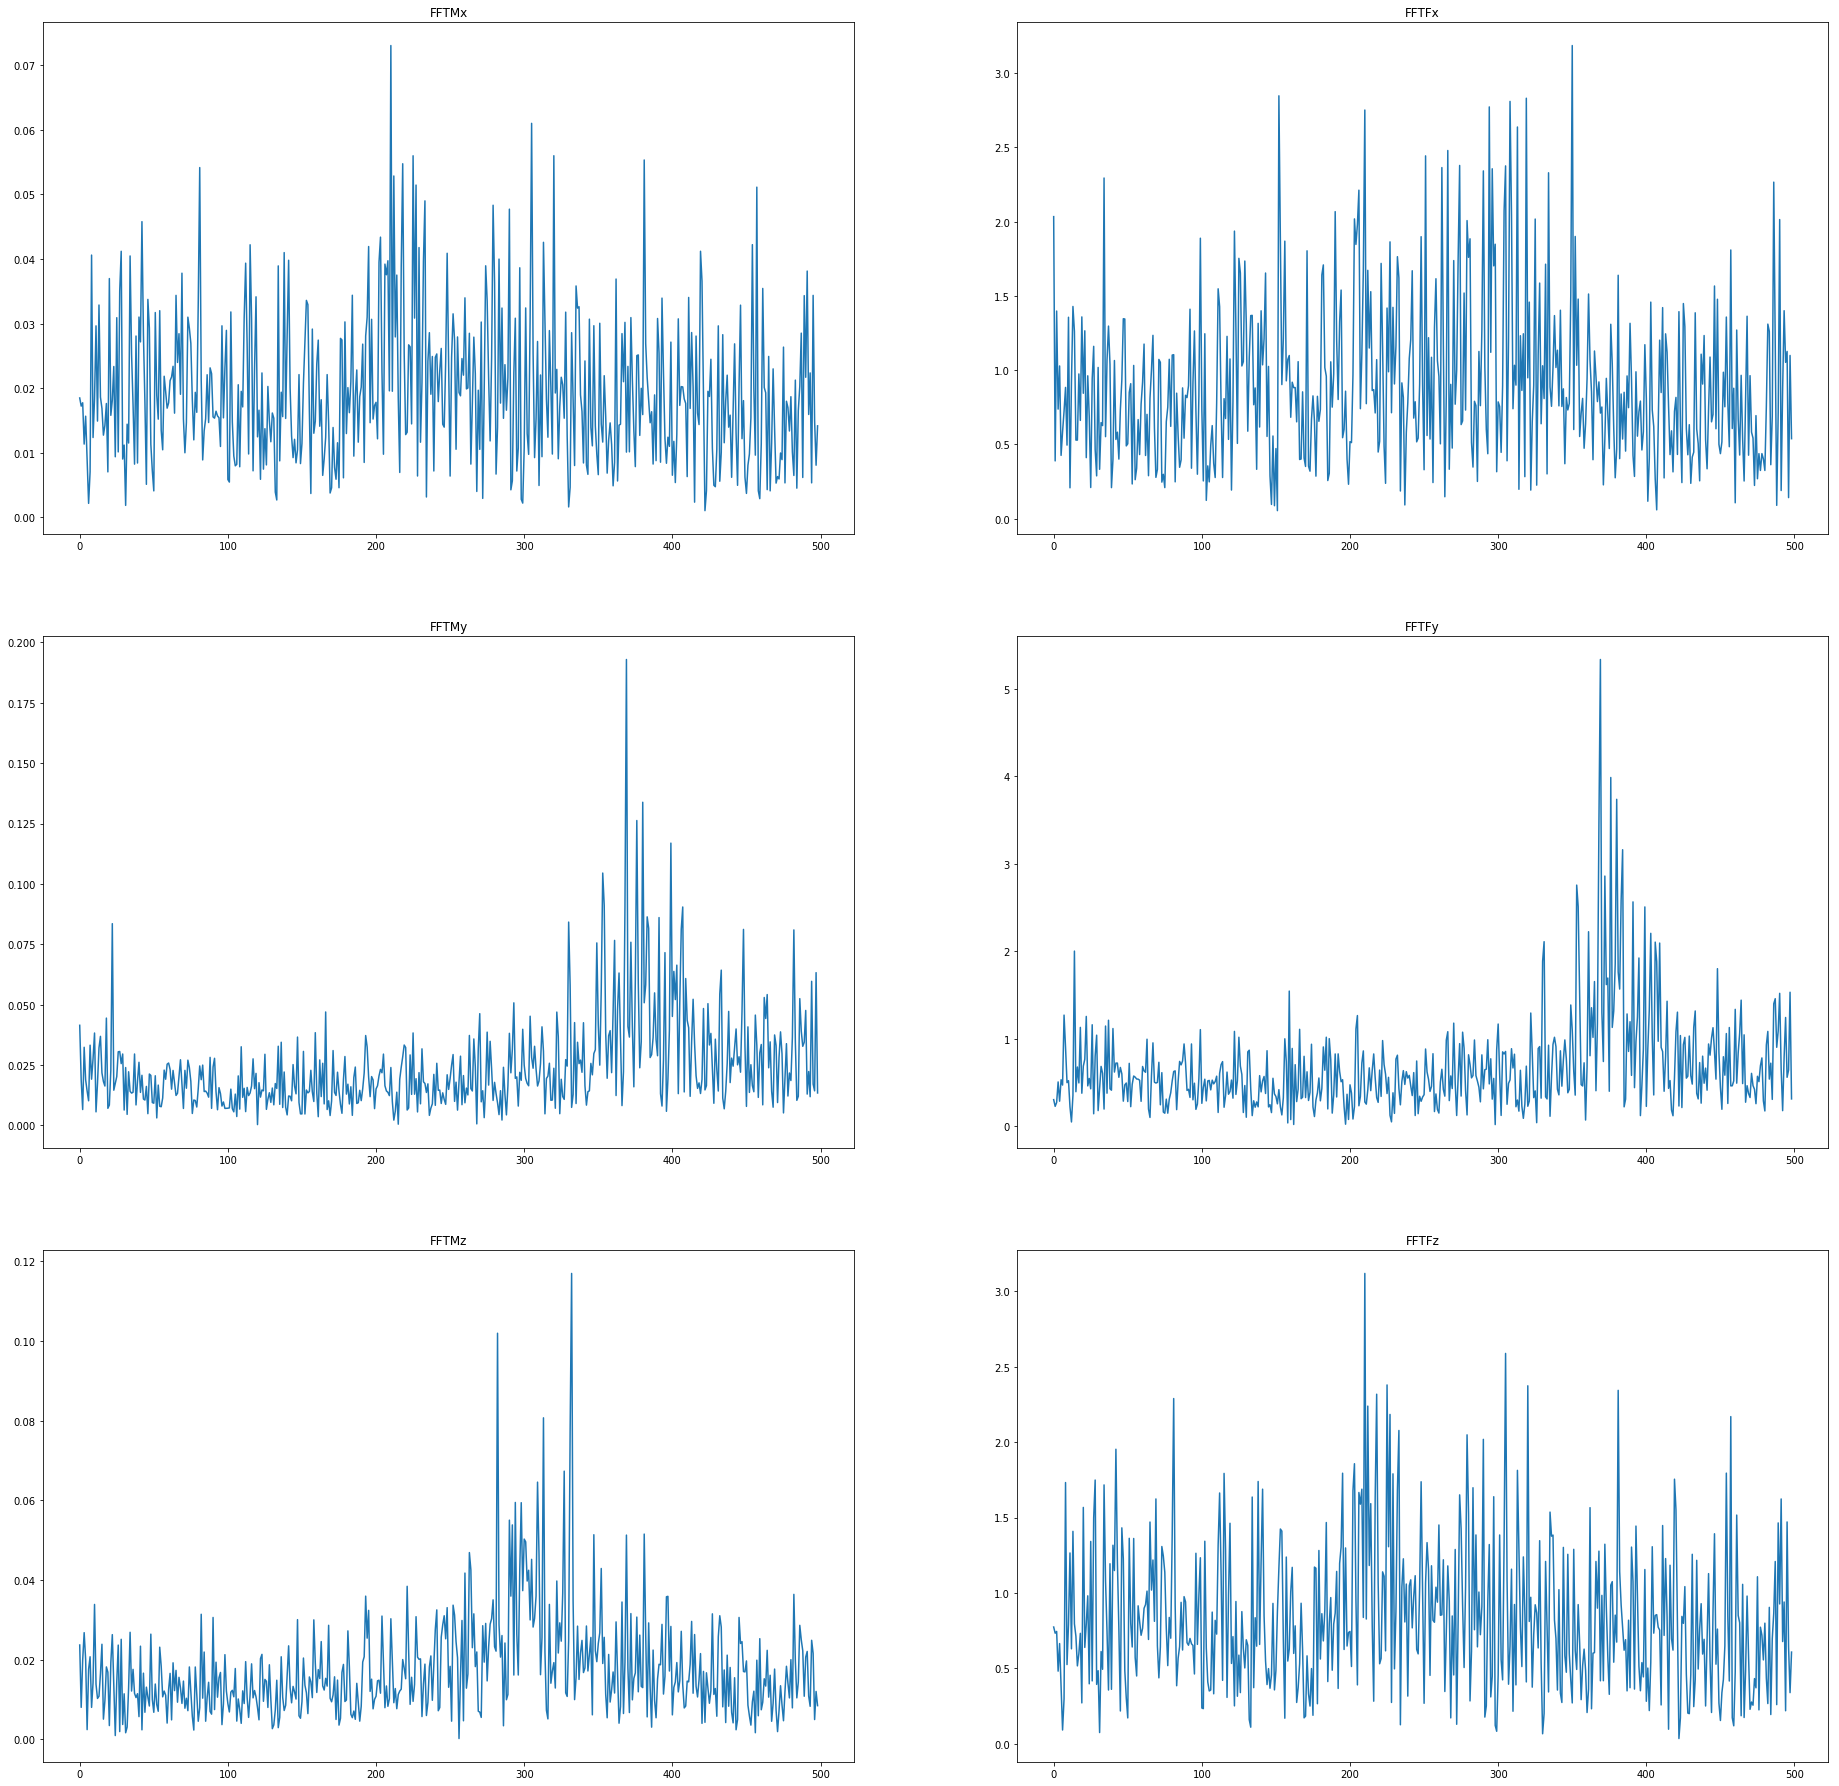

In [100]:
CCC = ForceFFT(A03,small = -4, big = -0.6, start = 10000, step = 1000)
CCC.draw_FFT_1()

原始数据大小是: (2000001, 10)。
除0后数据大小是: (1726908, 10)。
除停机数据后大小是: (1564976, 10)。
选择起始点10000，终止点11000进行FFT，共(1000, 10)个数据。


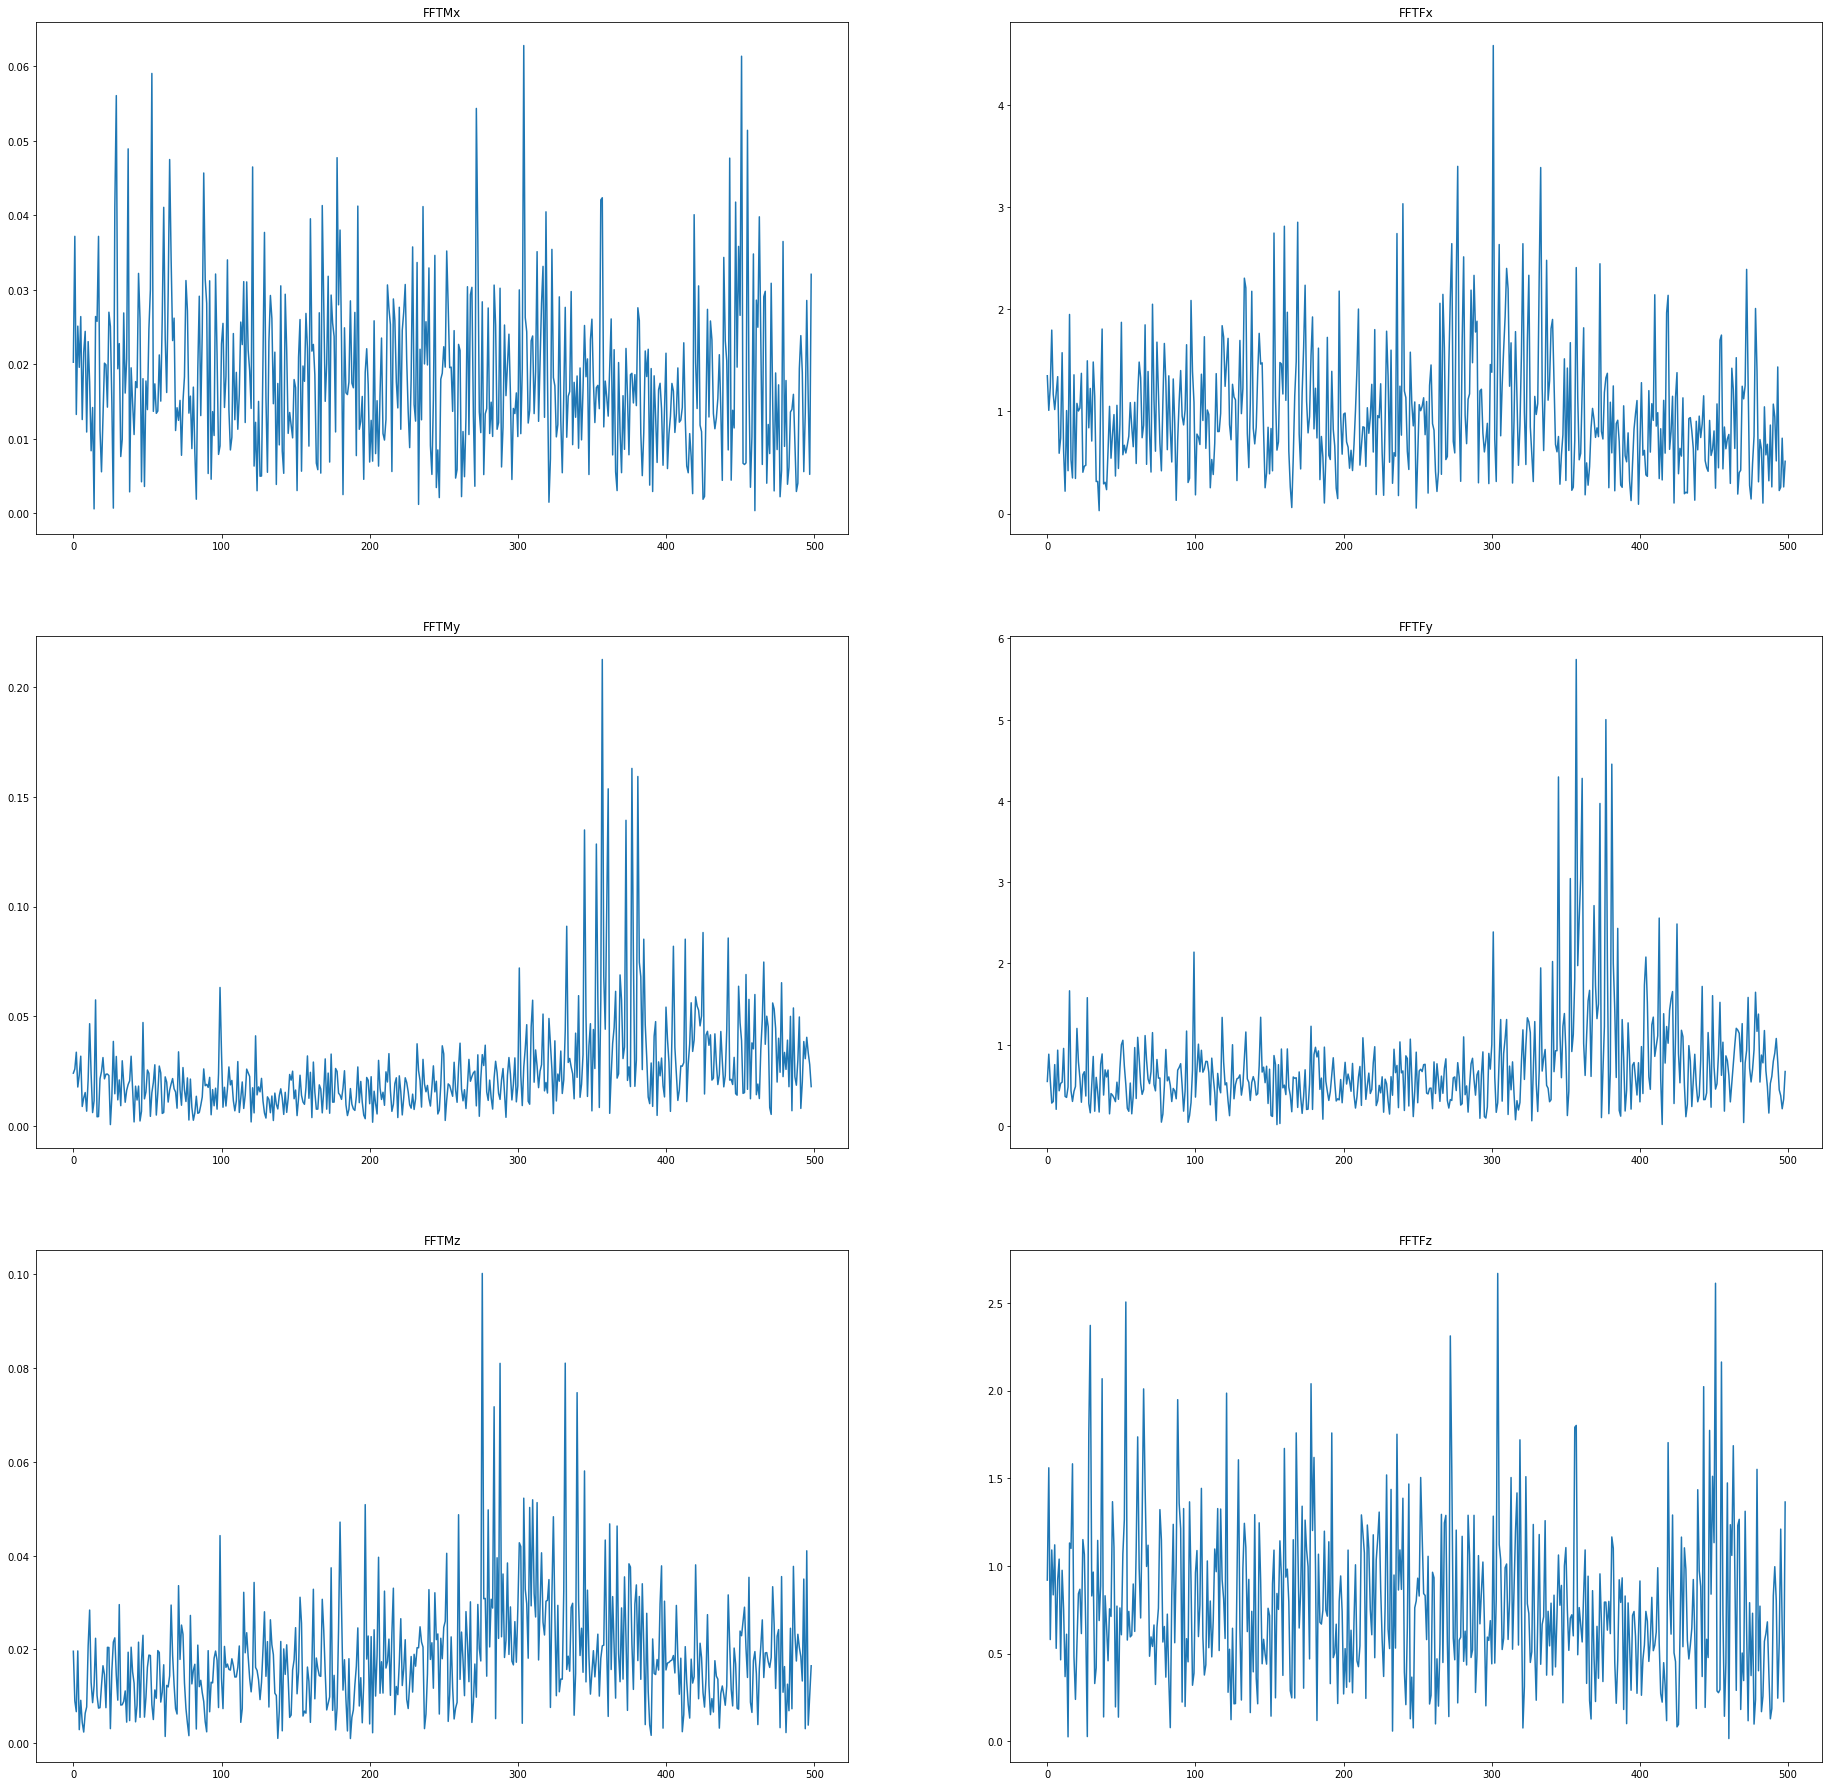

In [99]:
DDD = ForceFFT(A04,small = -4, big = -0.6, start = 10000, step = 1000)
DDD.draw_FFT_1()

原始数据大小是: (1000001, 10)。
除0后数据大小是: (211530, 10)。
除停机数据后大小是: (175425, 10)。
选择起始点10000，终止点11000进行FFT，共(1000, 10)个数据。


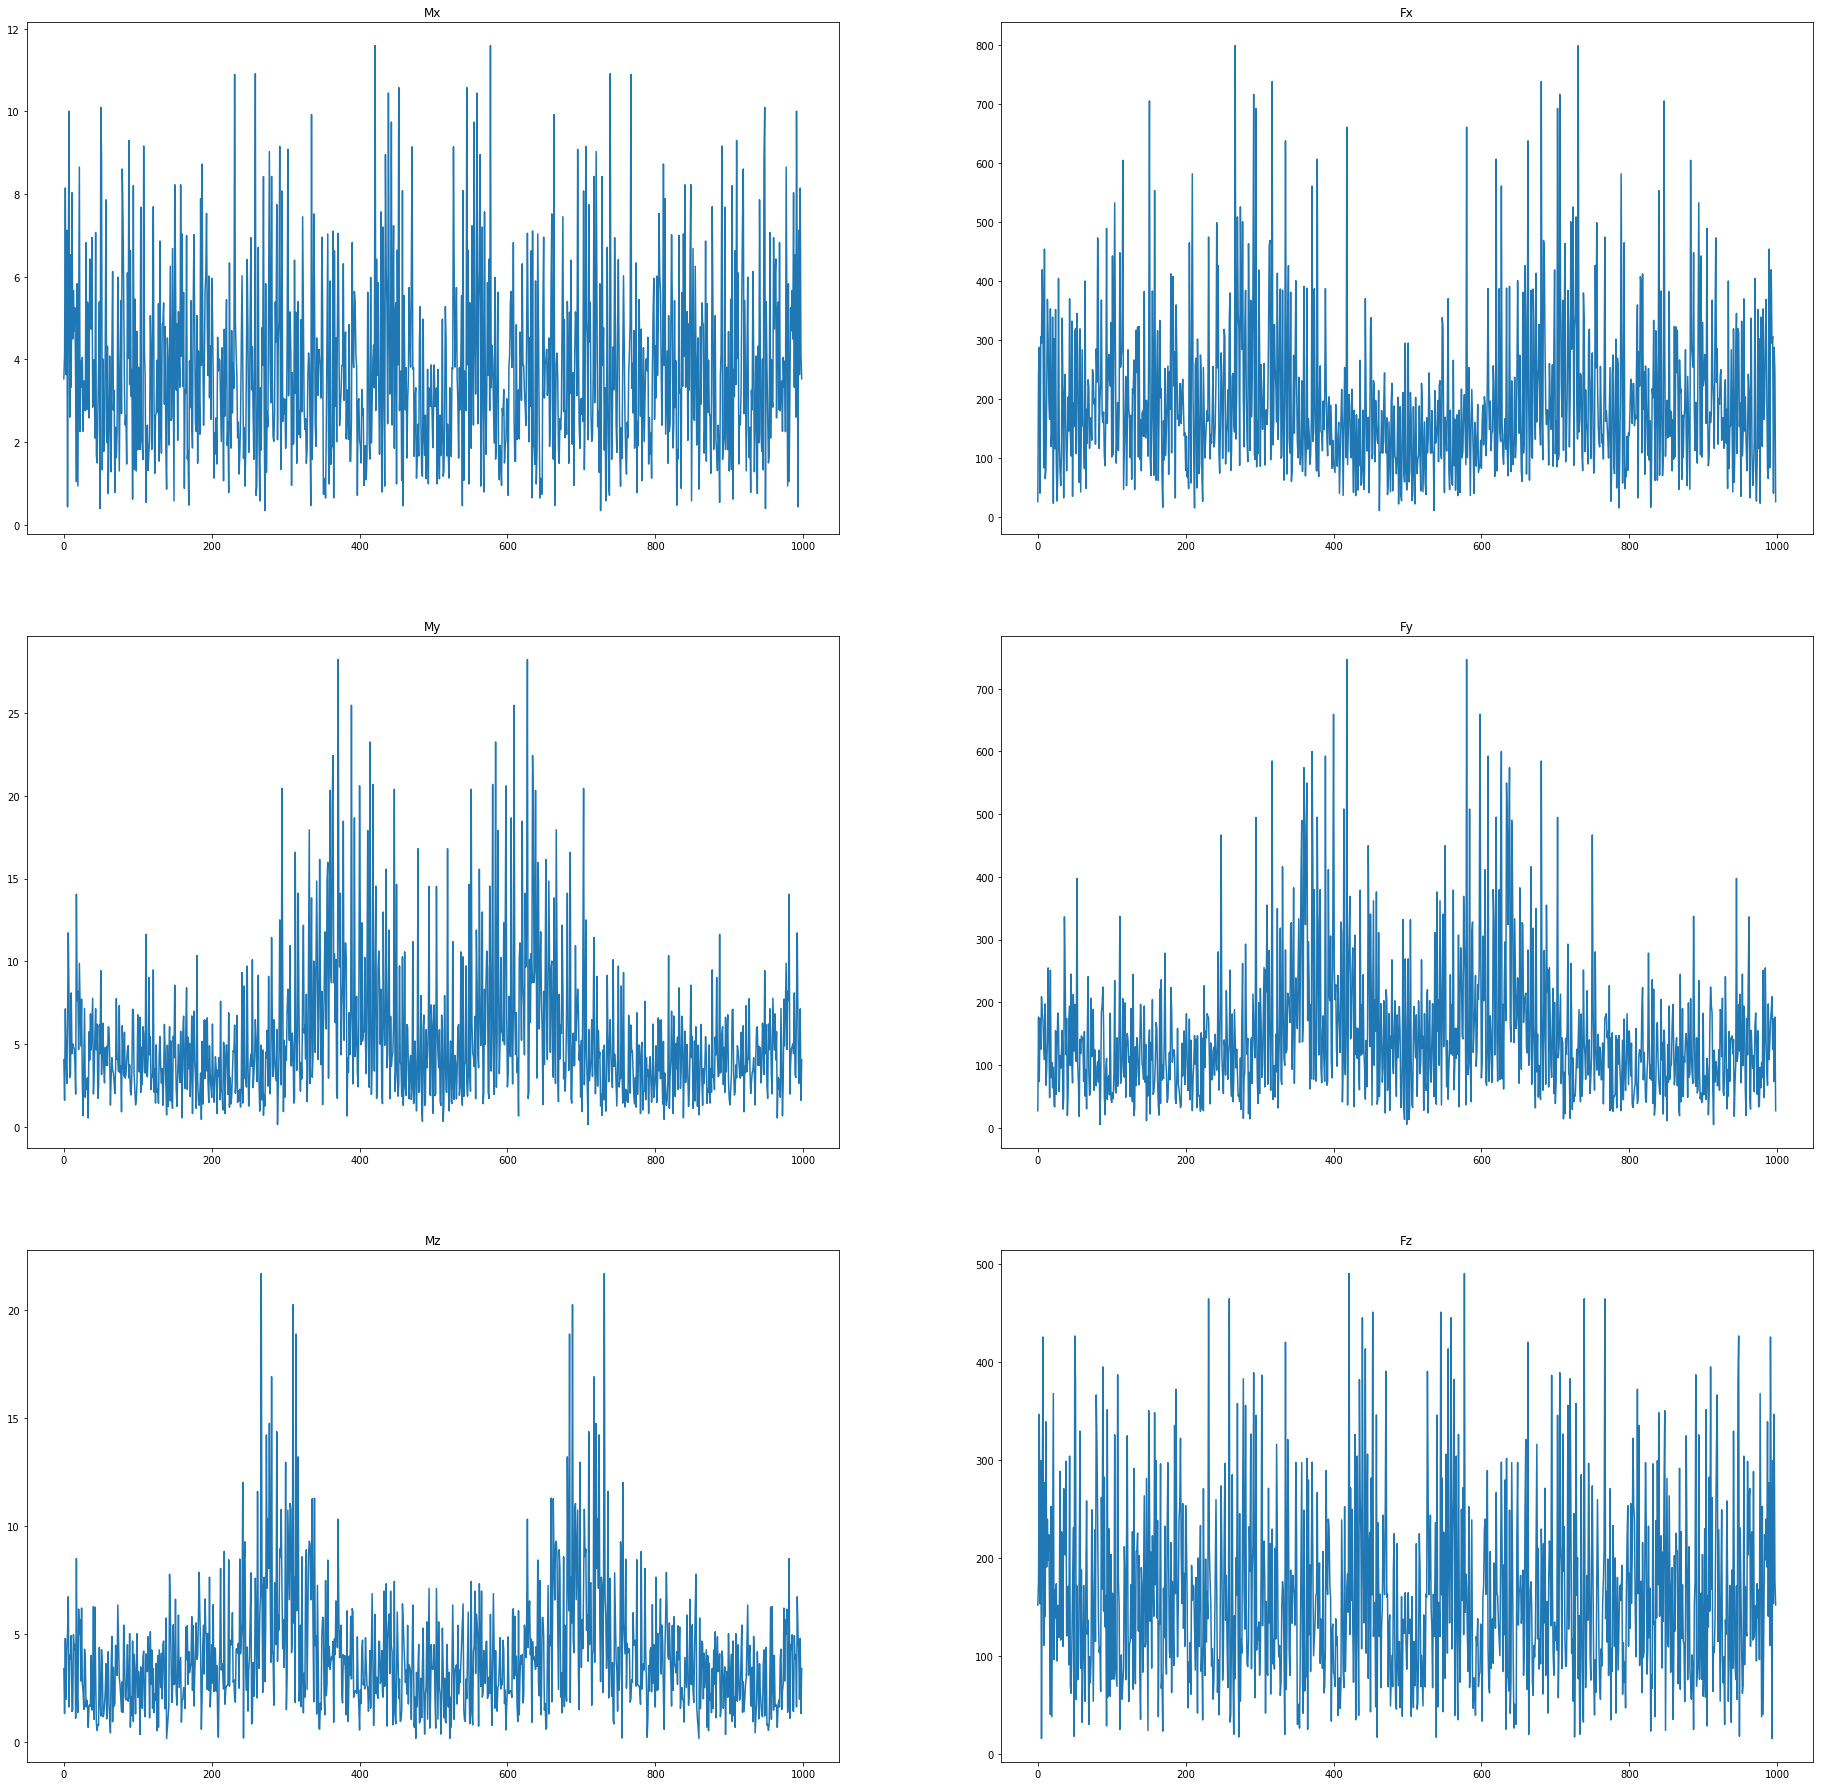

In [74]:


AAA.draw_FFT_0()

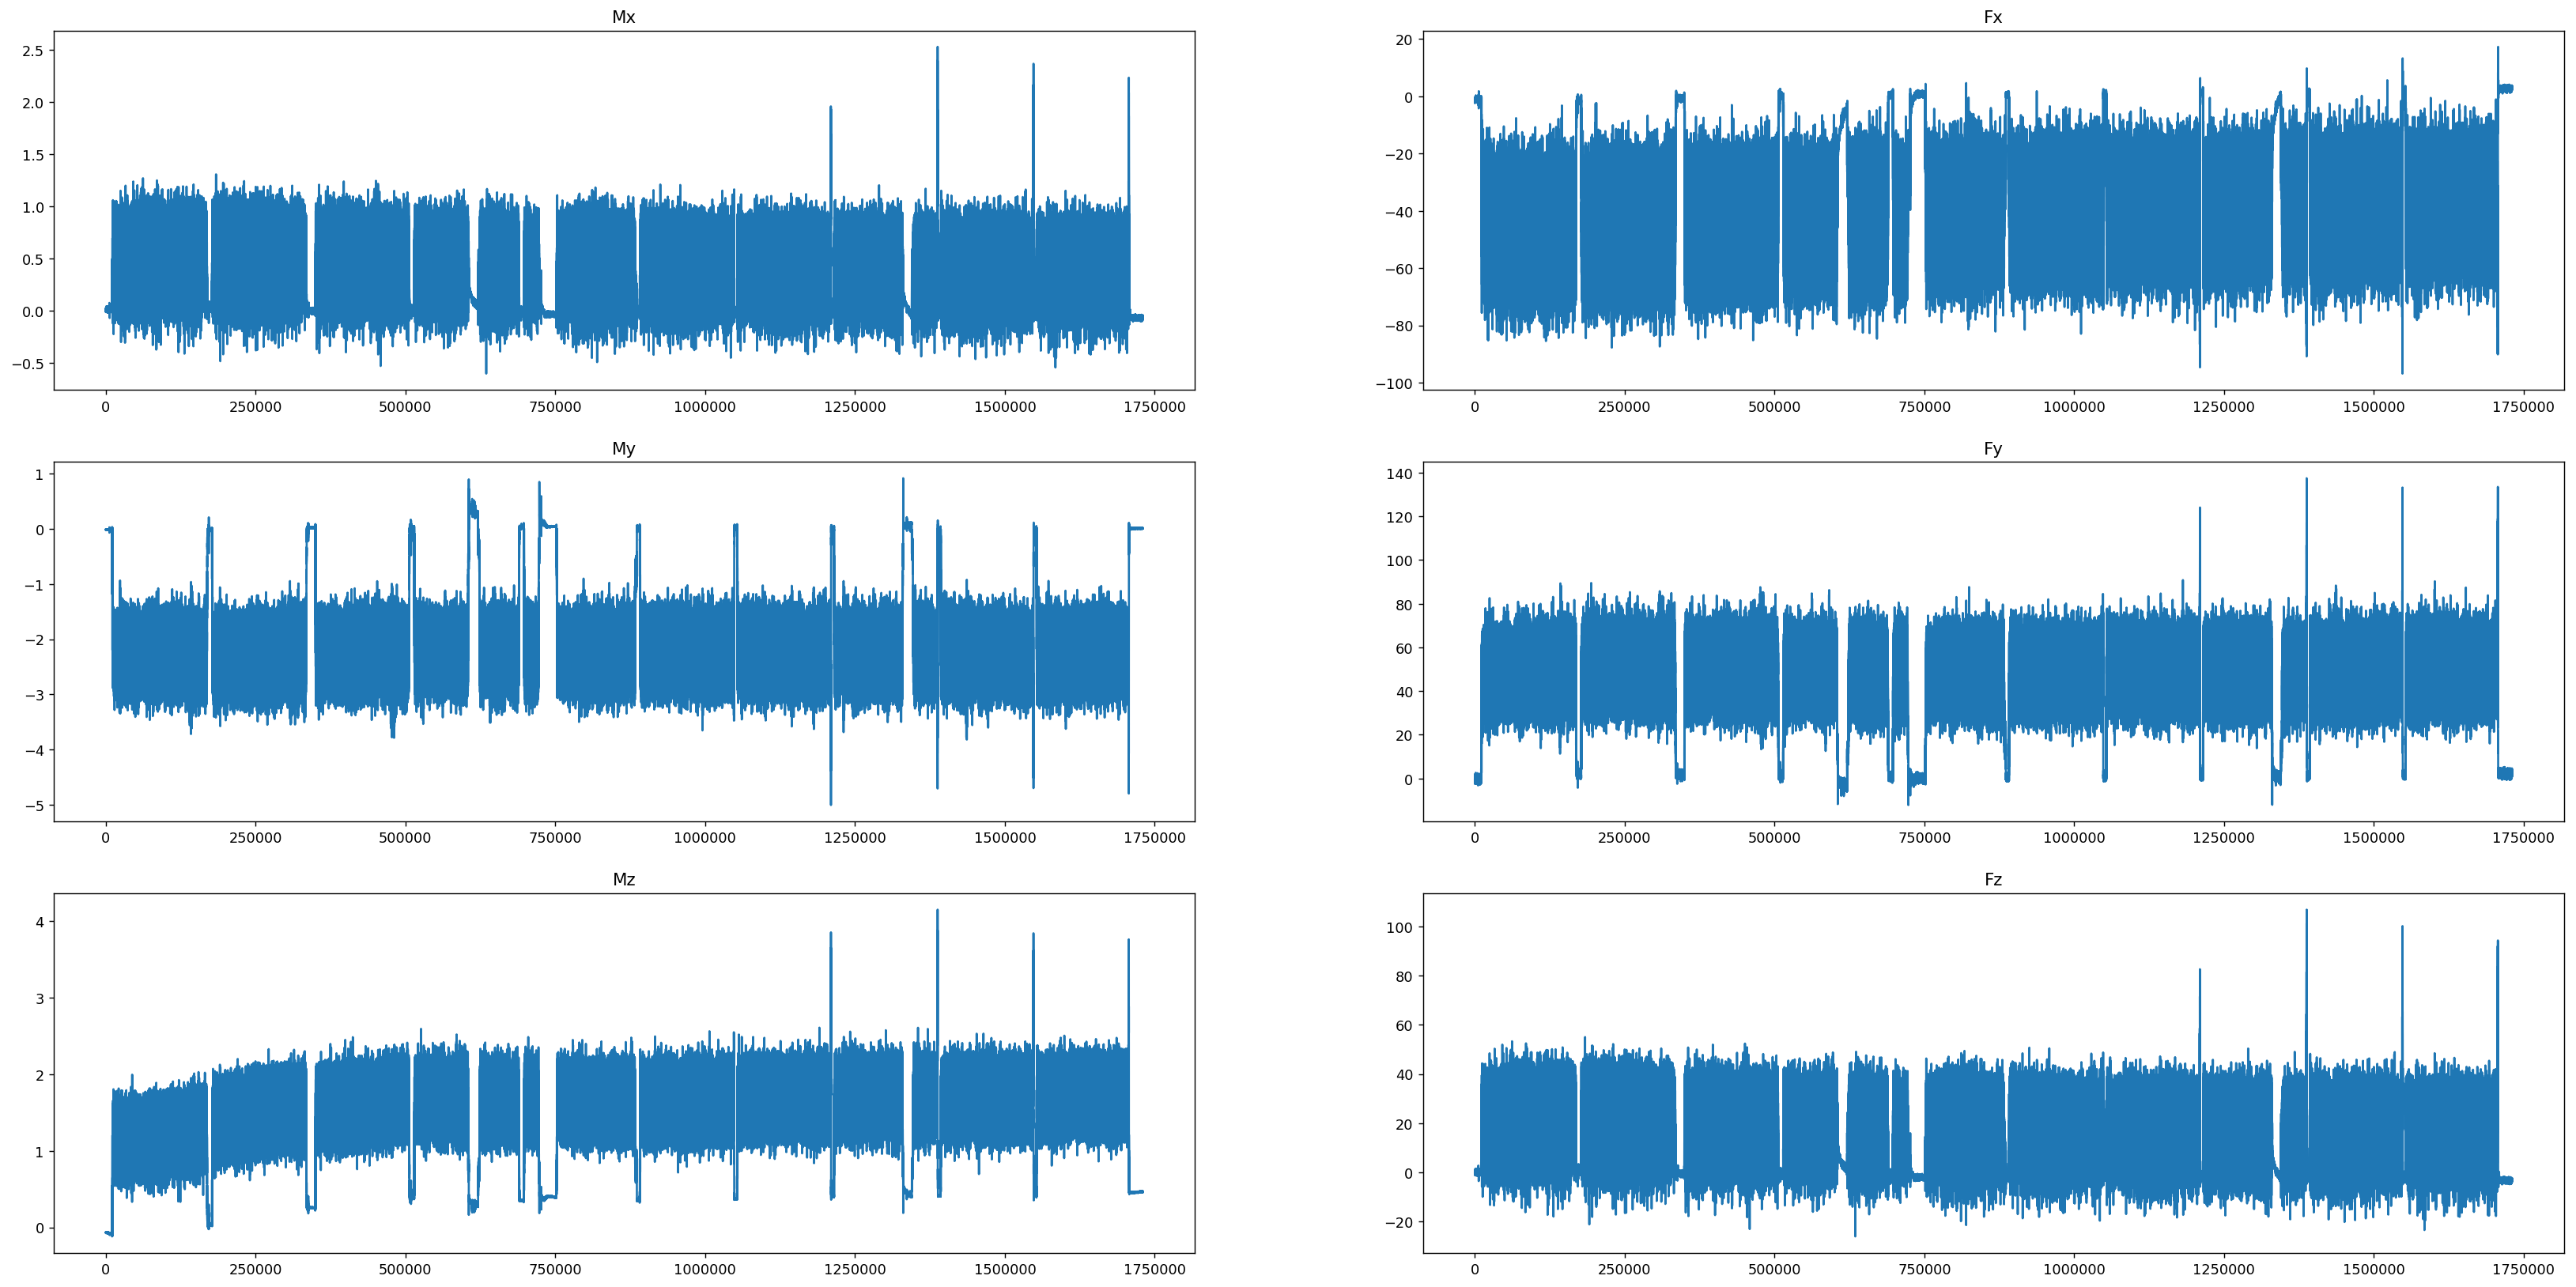

In [15]:
plt.figure(figsize=(32,16), dpi = 128) # 设定画图板尺寸

AAA = A04.query('Fx12!=0 and Fx34!=0 and Fy14!=0')

plt.subplot(322)
plt.title('Fx')
plt.plot(AAA.Fx, grid)
plt.subplot(324)
plt.title('Fy')
plt.plot(AAA.Fy)
plt.subplot(326)
plt.title('Fz')
plt.plot(AAA.Fz)
plt.subplot(321)
plt.title('Mx')
plt.plot(AAA.Mx)
plt.subplot(323)
plt.title('My')
plt.plot(AAA.My)
plt.subplot(325)
plt.title('Mz')
plt.plot(AAA.Mz)
plt.savefig(r'D:\data\20190513\Force\A04.jpg')
plt.show()

原始数据大小是：(2500001, 10)
除0后数据大小是(1796047, 10)。
除停机数据后大小是(1624317, 10)。
选择起始点1260000，终止点1265000进行FFT，共(5000, 10)个数据。
除0后数据大小是(1796047, 10)。


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


除停机数据后大小是(1624317, 10)。
选择起始点1260000，终止点1265000进行FFT，共(5000, 10)个数据。


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


除0后数据大小是(1796047, 10)。


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


除停机数据后大小是(1624317, 10)。
选择起始点1260000，终止点1265000进行FFT，共(5000, 10)个数据。
除0后数据大小是(1796047, 10)。


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


除停机数据后大小是(1624317, 10)。
选择起始点1260000，终止点1265000进行FFT，共(5000, 10)个数据。


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: Matplotlib

除0后数据大小是(1796047, 10)。


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


除停机数据后大小是(1624317, 10)。
选择起始点1260000，终止点1265000进行FFT，共(5000, 10)个数据。
除0后数据大小是(1796047, 10)。


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


除停机数据后大小是(1624317, 10)。
选择起始点1260000，终止点1265000进行FFT，共(5000, 10)个数据。


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


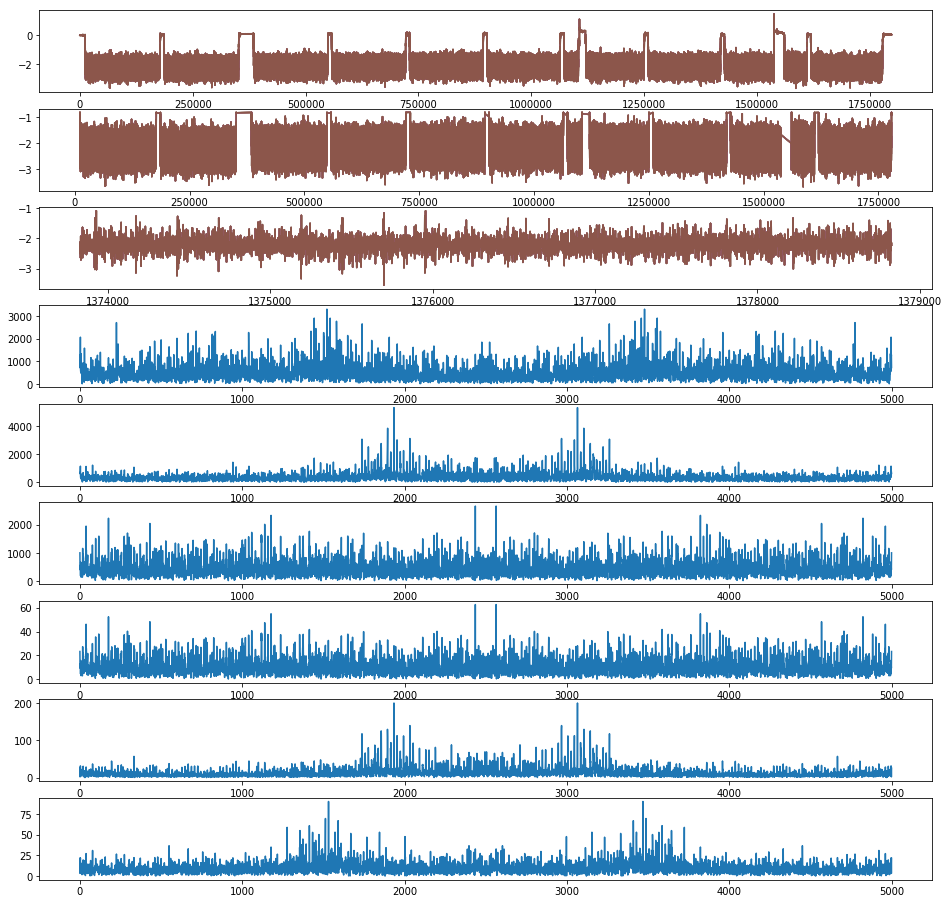

In [13]:
A_1 = Manage(A03,small = -4, big = -0.8, start = 1260000, step = 5000)
#A_1.cut_1()
#A_1.cut_2()
#A_1.cut_3()
A_1.FxFFT()
A_1.FyFFT()
A_1.FzFFT()
A_1.MxFFT()
A_1.MyFFT()
A_1.MzFFT()
#type(A_1.cut_3)
plt.savefig(r'D:\data\20190513\Force\20190513_03_small = -4, big = -0.8, start = 1260000, step = 5000.jpg')

原始数据大小是：(2000001, 10)
除0后数据大小是(1726908, 10)。
除停机数据后大小是(1562207, 10)。
选择起始点1000000，终止点1005000进行FFT，共(5000, 10)个数据。
除0后数据大小是(1726908, 10)。


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


除停机数据后大小是(1562207, 10)。
选择起始点1000000，终止点1005000进行FFT，共(5000, 10)个数据。


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


除0后数据大小是(1726908, 10)。


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


除停机数据后大小是(1562207, 10)。
选择起始点1000000，终止点1005000进行FFT，共(5000, 10)个数据。


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: Matplotlib

除0后数据大小是(1726908, 10)。
除停机数据后大小是(1562207, 10)。
选择起始点1000000，终止点1005000进行FFT，共(5000, 10)个数据。
除0后数据大小是(1726908, 10)。


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


除停机数据后大小是(1562207, 10)。
选择起始点1000000，终止点1005000进行FFT，共(5000, 10)个数据。
除0后数据大小是(1726908, 10)。

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: Matplotlib

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


除停机数据后大小是(1562207, 10)。
选择起始点1000000，终止点1005000进行FFT，共(5000, 10)个数据。


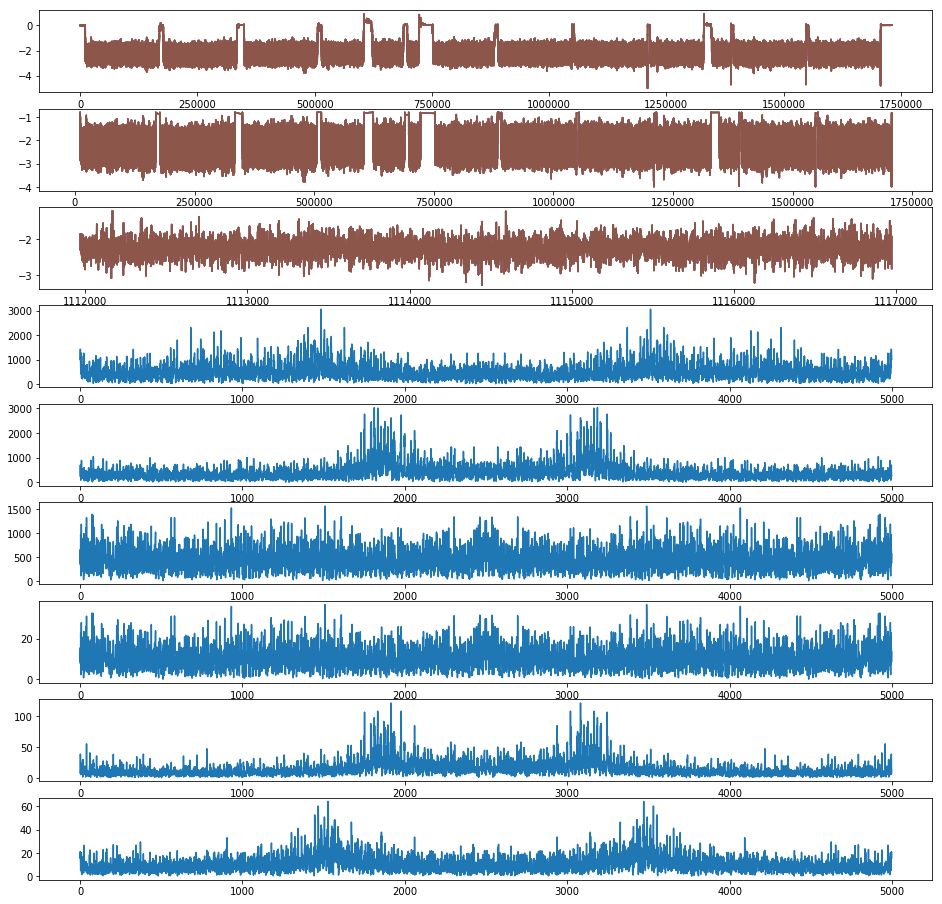

In [146]:
A_1 = Manage(A,small = -4, big = -0.8, start = 1000000, step = 5000)
#A_1.cut_1()
#A_1.cut_2()
#A_1.cut_3()
A_1.FxFFT()
A_1.FyFFT()
A_1.FzFFT()
A_1.MxFFT()
A_1.MyFFT()
A_1.MzFFT()
#type(A_1.cut_3)
plt.savefig(r'D:\data\20190513\Force\20190513_04_small = -4, big = -0.8, start = 1000000, step = 5000.jpg')

原始数据大小是：(2000001, 10)
除0后数据大小是(1726908, 10)。
除停机数据后大小是(1563634, 10)。
选择起始点1540000，终止点1545000进行FFT，共(5000, 10)个数据。
除0后数据大小是(1726908, 10)。


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


除停机数据后大小是(1563634, 10)。
选择起始点1540000，终止点1545000进行FFT，共(5000, 10)个数据。


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


除0后数据大小是(1726908, 10)。


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


除停机数据后大小是(1563634, 10)。
选择起始点1540000，终止点1545000进行FFT，共(5000, 10)个数据。
除0后数据大小是(1726908, 10)。

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: Matplotlib


除停机数据后大小是(1563634, 10)。
选择起始点1540000，终止点1545000进行FFT，共(5000, 10)个数据。


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: Matplotlib

除0后数据大小是(1726908, 10)。
除停机数据后大小是(1563634, 10)。
选择起始点1540000，终止点1545000进行FFT，共(5000, 10)个数据。
除0后数据大小是(1726908, 10)。


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


除停机数据后大小是(1563634, 10)。
选择起始点1540000，终止点1545000进行FFT，共(5000, 10)个数据。


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


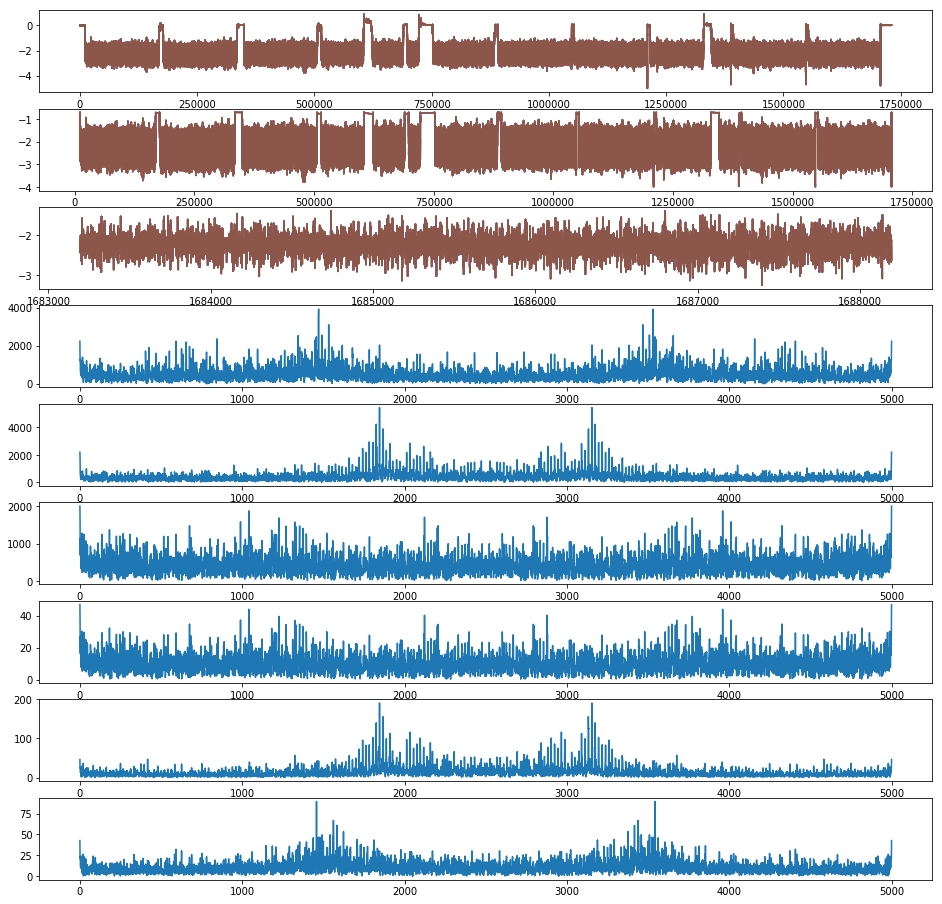

In [148]:
A_2 = Manage(A,small = -4, big = -0.7, start = 1540000, step = 5000)
A_2.FxFFT()
A_2.FyFFT()
A_2.FzFFT()
A_2.MxFFT()
A_2.MyFFT()
A_2.MzFFT()
#type(A_1.cut_3)
plt.savefig(r'D:\data\20190513\Force\20190513_04_small = -4, big = -0.8, start = 1540000, step = 5000.jpg')

除0后数据大小是(1726908, 10)。
除停机数据后大小是(1563634, 10)。
选择起始点1540000，终止点1545000进行FFT，共(5000, 10)个数据。


ValueError: x, y, and format string must not be None

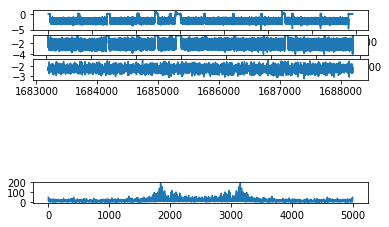

In [149]:
plt.plot(A_2.MyFFT())

The size of the data_0 is (1000001, 10)
The size of the data_1 is (211530, 10)
The size of the data_2 is (174778, 10)


AttributeError: 'Manage' object has no attribute 'data_2'

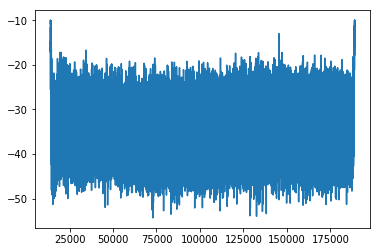

In [166]:
class Manage():
    def __init__(self, data_0):
        self.data_0 = data_0
        print('The size of the data_0 is {}'.format(self.data_0.shape))
        #plt.plot(self.data_0.Fx12)
        
    def cut_1(self):
        data_1 = self.data_0.query('Fx12!=0 and Fx34!=0 and Fy14!=0')
        print('The size of the data_1 is {}'.format(data_1.shape))
        return data_1
        
    def 
        data_2 = data_1.query('Fx12<-10 and Fx12>-100')
        print('The size of the data_2 is {}'.format(data_2.shape))
        plt.plot(data_2.Fx12)
        #return data_2.shape
    
    def photo(self):
        self.cut()
        plt.plot(self.data_2.Fx_2)
#    def cut_1(self, i):
A_1 = Manage(A)
A_1.photo()

#plt.plot(A_1.cut.data_1)
#plt.plot(A_1.cut.data_2.Fx12)

The size of the data_1 is (211530, 10)
The size of the data_2 is (174778, 10)


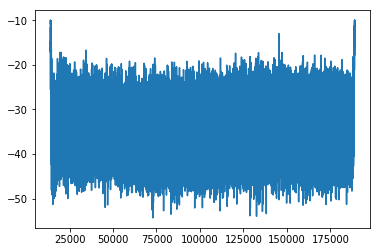

In [133]:
A_1.cut()

In [159]:
class Manage():
    def __init__(self, data_0):
        self.data_0 = data_0
        print('The size of the data_0 is {}'.format(self.data_0.shape)
        plt.plot(self.data_0.Fx12)
        
    def cut(self, small, big):
        
        data_1 = self.data_0.query('Fx12!=0 and Fx34!=0 and Fy14!=0')
        print('The size of the data_1 is {}'.format(data_1.shape))
        data_2 = data_1.query('Fx12<{} and Fx12>{}'.format(big, small))
        print('The size of the data_2 is {}'.format(data_2.shape))
        #return data_2.shape
        
    #def pre()

    
#    def cut_1(self, i):
A_1 = Manage(A)
#A_1.cut_1()
#A_1.cut(-100, -10)
#plt.plot(A_1.cut.data_1)
plt.plot(A_1.data_2.Fx12)

AttributeError: type object 'A' has no attribute 'shape'

In [83]:
A_1.cut(-10,100)

TypeError: cut() takes 1 positional argument but 3 were given

In [152]:
class A():
    def test_a(self):
        self.m ="hello\n"

    def test_b(self):
        self.test_a()
        n=self.m + "world"
        print(n)

A().test_b()


hello
world


In [ ]:
 class Solution(object):
    import math
    def is_square(self,n):
        s=int(math.sqrt(n))
        return s*s==n


    def numSquares(self, n):
        """
        :type n: int
        :rtype: int
        """
        if Solution.is_square(self,n)==True:
            return 1
        while n%4==0:
            n=n/4
        if n%8==7:
            return 4
        i=1
        while i*i<n:
            if Solution.is_square(self,n-i*i)==True:
                return 2
            i+=1
        return 3


In [ ]:
class Solution(object):
    import math
    def is_square(self,n):
        s=int(math.sqrt(n))
        return s*s==n
    def numSquares(self, n):
        """
        :type n: int
        :rtype: int
        """
        if self.is_square(n)==True:
            return 1
        while n%4==0:
            n=n/4
        if n%8==7:
            return 4
        i=1
        while i*i<n:
            if self.is_square(n-i*i)==True:
                return 2
            i+=1
        return 3
